https://arxiv.org/pdf/2011.09409.pdf

The name is used to create batch file for tql in tql/tests/Winters2020.

In [4]:
from astropy.table import Table


url = "https://www.cfa.harvard.edu/~jwinters/table3.dat"
tab = Table.read(url, format="ascii")
df = tab.to_pandas()
df.head()

/home/jp/miniconda3/envs/py3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: TableReplaceWarning: converted column 'Date' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)


,RA,DE,Name,Comp,2MAID,Config,Sep,PA,Date,Tech,...,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,n_Kmag,Mass,e_Mass,n_Mass,Memb
0,00:04:36.46,-40:44:02.7,GJ 1001,A,00043643-4044020,A-BC,18.2,259,2003.0,visdet,...,0.021,8.043,0.031,7.737,0.040,NaN,0.262,0.015,NaN,s
1,00:06:43.19,-07:32:17.0,GJ 1002,NaN,00064325-0732147,NaN,NaN,NaN,NaN,NaN,...,0.019,7.792,0.034,7.439,0.021,NaN,0.115,0.014,NaN,s
2,00:08:55.17,+49:18:56.3,LP 191-43,NaN,00085512+4918561,NaN,NaN,NaN,NaN,NaN,...,0.022,10.320,0.021,9.980,0.018,NaN,0.111,0.014,NaN,s
3,00:11:31.81,+59:08:39.9,LSPM 0011+5908,NaN,00113182+5908400,NaN,NaN,NaN,NaN,NaN,...,0.023,9.393,0.026,9.093,0.021,NaN,0.107,0.014,NaN,s
4,00:15:28.07,-16:08:01.8,GJ 1005,A,00152799-1608008,AB,0.3037,orb,1997.0,astrad,...,0.019,6.712,0.034,6.390,0.016,J,0.179,0.002,c,s


In [9]:
df.Name.to_csv('../../tql/tests/Winters2020/winters2020.txt', index=False, header=False)

## closer look at individual targets

In [1]:
    import lightkurve as lk
lk.__version__

'2.0.9'

In [17]:
# r = lk.search_targetpixelfile("TIC 410153553") #
# r = lk.search_targetpixelfile("TIC 332064670") # 55 Cnc
# r = lk.search_targetpixelfile("LHS3844")
# r = lk.search_targetpixelfile("LTT1445")
# r = lk.search_targetpixelfile("GJ324")
r

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 01,2018,SPOC,120,410153553,0.0
1,TESS Sector 01,2018,TESS-SPOC,1800,410153553,0.0
2,TESS Sector 27,2020,SPOC,20,410153553,0.0
3,TESS Sector 27,2020,SPOC,120,410153553,0.0
4,TESS Sector 27,2020,TESS-SPOC,600,410153553,0.0
5,TESS Sector 28,2020,SPOC,20,410153553,0.0
6,TESS Sector 28,2020,SPOC,120,410153553,0.0
7,TESS Sector 28,2020,TESS-SPOC,600,410153553,0.0


In [18]:
tpf = r[6].download()

In [19]:
tpf.interact_sky()

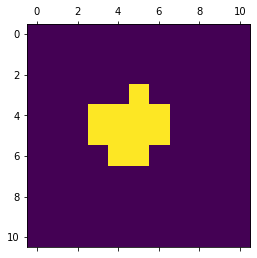

In [20]:
import matplotlib.pyplot as pl
pl.matshow(tpf.pipeline_mask)

In [21]:
tpf.interact(aperture_mask='pipeline')

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

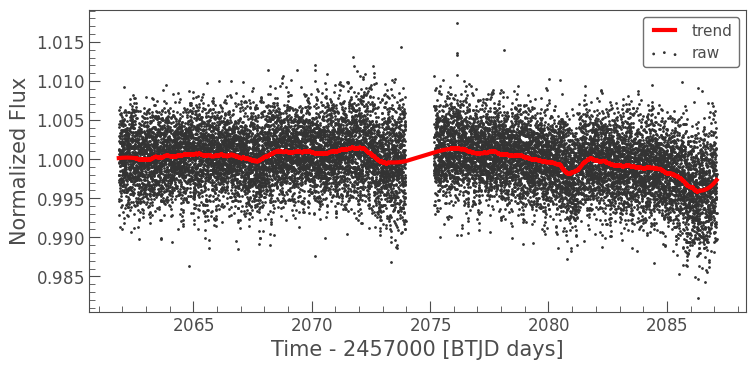

In [24]:
lc = tpf.to_lightcurve().normalize().remove_outliers()
flat, trend = lc.flatten(window_length=1001, return_trend=True, break_tolerance=50)
ax = lc.scatter(label='raw')
trend.plot(ax=ax, c='r', lw=3, label='trend')

In [25]:
flat.interact_bls()